In [ ]:
import laspy
import glob
import matplotlib.pyplot as plt



import convert_files as cf
print(laspy.__version__)


successful conversion
2.4.1


In [ ]:
#from laz2las import convert_laz_to_las

input_file = "D:/01_Personal_Projects/Projects2023/All_Data/3D_Data/3dm_32_280_5652_1_nw.laz"
output_file = "D:/01_Personal_Projects/Projects2023/All_Data/3D_Data/3dm_32_280_5652_1_nw.las"

#cf.laz_to_las(input_file, output_file)

In [ ]:
# Open the .las file
las = laspy.read(output_file)


# Access the X, Y, and Z coordinates
x = las.x
y = las.y
z = las.z

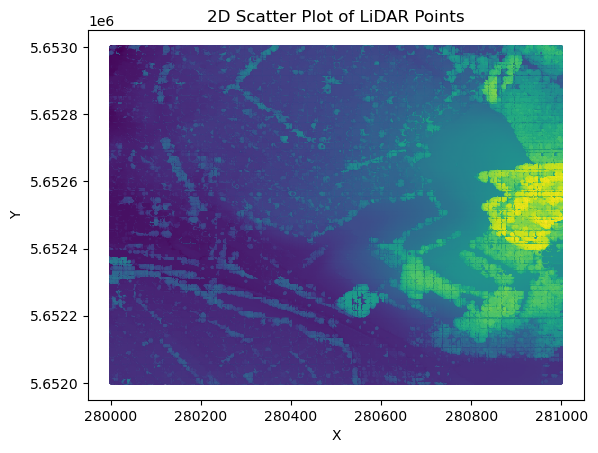

In [ ]:

# Create a scatter plot
plt.scatter(x, y, s=1, c=z, cmap='viridis')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot of LiDAR Points')

# Show the plot
plt.show()

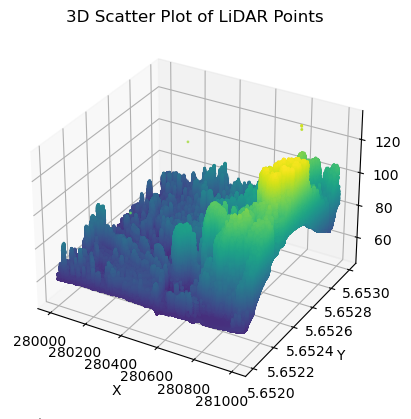

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, c=z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of LiDAR Points')

# Show the plot
plt.show()


In [ ]:
import laspy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

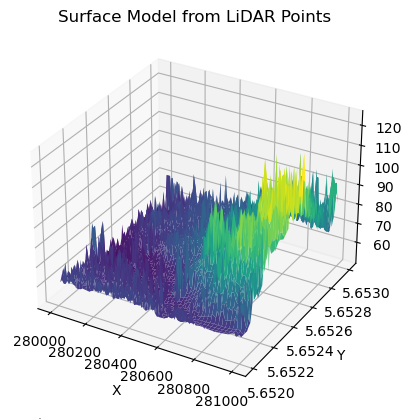

In [ ]:
# Open the .las file
las = laspy.read(output_file)

# Access the X, Y, and Z coordinates
x = las.x
y = las.y
z = las.z

# Create a regular grid for interpolation
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate elevation values on the grid
Z = griddata((x, y), z, (X, Y), method='linear')

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Model from LiDAR Points')

# Show the plot
plt.show()


In [ ]:
import laspy
import numpy as np
import plotly.graph_objects as go

# Open the .las file
las = laspy.read(output_file)

# Access the X, Y, and Z coordinates
x = las.x
y = las.y
z = las.z

# Create a regular grid for interpolation
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate elevation values on the grid
Z = griddata((x, y), z, (X, Y), method='linear')

# Create an interactive 3D surface plot
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='viridis')])

# Set layout properties
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectratio=dict(x=1, y=1, z=0.5),
        camera=dict(
            eye=dict(x=-1.25, y=-1.25, z=0.6),
            center=dict(x=0, y=0, z=0),
            up=dict(x=0, y=0, z=1)
        ),
    ),
    title='Surface Model from LiDAR Points'
)

# Show the interactive plot
fig.show()
